In [0]:
!pip install bs4

In [0]:
!pip install selenium

     |████████████████████████████████| 911kB 2.8MB/s 


In [0]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [92.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [0]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 31 not upgraded.
Need to get 77.3 MB of archives.
After this operation, 264 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 81.0.4044.138-0ubuntu0.18.04.1 [1,095 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 81.0.4044.138-0ubuntu0.18.04.1 [68.9 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 81.0.4

In [0]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


## Selenium Web Driver

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver', options=chrome_options)

# wd.close()

## PATH Settings

In [1]:
import os
os.getcwd()

'/content'

In [2]:
PATH = 'drive/My Drive/Colab Notebooks/Steam_crawler/'
os.chdir(PATH)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Steam_crawler'

## Title, Tag Crawling

In [0]:
from bs4 import BeautifulSoup
import time
import csv

PAGE_NUMBER = 1005

with open('data.csv', 'w', encoding='utf-8') as result_f:
    writer = csv.writer(result_f)
    writer.writerow(['title', 'tags'])

    for page in range(PAGE_NUMBER):
        try:
            # Rest every 50 pages
            if page // 50 == 49:
                time.sleep(60)

            wd.get("https://store.steampowered.com/games/#p=0&tab=ConcurrentUsers")
            time.sleep(10)

            html = wd.page_source
            soup = BeautifulSoup(html, 'html.parser')

            concurrent_table = soup.find('div', id='ConcurrentUsersRows')

            tab_items = concurrent_table.find_all('a', class_='tab_item')

            for tab_item in tab_items:
                # Crawl Title
                title_tag_list = list()
                title_object = tab_item.find('div', class_='tab_item_name')
                title_tag_list.append(title_object.text)

                # Crawl Tags
                tag_object_list = tab_item.find_all('span', class_='top_tag')
                temp_list = list(map(lambda tag_object: tag_object.text, tag_object_list))
                temp_list = list(map(lambda tag: tag.replace(",", " ").strip(), temp_list))
                title_tag_list.extend(temp_list)

                # write
                writer.writerow(title_tag_list)
           
            next_btn = wd.find_element_by_css_selector('#ConcurrentUsers_btn_next')
            next_btn.click()
            print(page)


        except Exception as e:
            print(e)
            writer.writerow(page)
    
        



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## 인기태그 크롤링
ISSUE: 인기태그와 실제 데이터 태그랑 맞지 않음

In [0]:
import csv
import requests
from bs4 import BeautifulSoup


# What's being played
# for page_num in range(PAGE_NUMBER):
req = requests.get('https://store.steampowered.com/tag/browse/#global_492')


html = req.text
soup = BeautifulSoup(html, 'html.parser')

tag_browser = soup.find('div', id='tag_browse_global')

tags = tag_browser.find_all('div', class_='tag_browse_tag')

tag_list = list()
for tag in tags:
    tag_list.append(tag.text)

print(tag_list)
with open('tag_list.csv', 'w', encoding='utf-8') as tag_file:
    wr = csv.writer(tag_file)
    wr.writerow(tag_list)



['Indie', 'Action', 'Adventure', 'Casual', 'Simulation', 'Strategy', 'RPG', 'Early Access', 'Free to Play', 'Singleplayer', 'Violent', 'Sports', 'Massively Multiplayer', 'Gore', 'Racing', 'Atmospheric', 'Nudity', '2D', 'Great Soundtrack', 'Puzzle', 'Sexual Content', 'Multiplayer', 'Story Rich', 'Anime', 'Difficult', 'Fantasy', 'VR', 'Horror', 'Funny', 'Pixel Graphics', 'Sci-fi', 'First-Person', 'Shooter', 'Female Protagonist', 'Open World', 'Platformer', 'Retro', 'Family Friendly', 'Co-op', 'Arcade', 'Utilities', 'Survival', 'FPS', 'Cute', 'Turn-Based', 'Visual Novel', 'Comedy', 'Design & Illustration', 'Exploration', 'Sandbox', 'Replay Value', 'Online Co-Op', 'Relaxing', 'Colorful', 'Psychological Horror', 'Classic', 'Movie', 'Controller', 'Point & Click', 'Masterpiece', 'Third Person', 'Space', 'Fast-Paced', 'Local Multiplayer', 'Mystery', 'Physics', 'Mature', 'Tactical', 'Dark', 'Education', 'Realistic', 'Zombies', 'Building', 'Memes', 'Short', 'Animation & Modeling', 'Management', 

## Pre-processing

In [3]:
import csv

# csv to list function
def csv2list(data):
    data_list = list()
    for row in data:
        data_list.append(row)
    return data_list

# Read train data
data_list = list()
with open('data.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)
    data_list = csv2list(data)

print(data_list[:5])


[['title', 'tags'], ['Counter-Strike: Global Offensive', 'FPS', 'Shooter', 'Multiplayer', 'Competitive'], ['Dota 2', 'Free to Play', 'MOBA', 'Multiplayer', 'Strategy'], ["PLAYERUNKNOWN'S BATTLEGROUNDS", 'Survival', 'Shooter', 'Multiplayer', 'Battle Royale'], ['Grand Theft Auto V', 'Open World', 'Action', 'Multiplayer', 'Automobile Sim']]


In [0]:
# split label/feature
train_label = list()
train_ft = list()

data_list = data_list[1:]
for data in data_list:
    train_label.append(data[0])
    train_ft.append(data[1:])

In [5]:
print(train_label[:2])
print(train_ft[:2])

['Counter-Strike: Global Offensive', 'Dota 2']
[['FPS', 'Shooter', 'Multiplayer', 'Competitive'], ['Free to Play', 'MOBA', 'Multiplayer', 'Strategy']]


In [6]:
from functools import reduce

# make total tag list
tag_set = reduce(lambda x, y: set(x) | set(y), train_ft)
print(len(tag_set))

381


In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tag_array = np.array(list(tag_set))

# fit onehotencoder
encoder = OneHotEncoder()
encoder.fit(tag_array.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [8]:
test = ['FPS']
test_ft = np.array(test).reshape(-1, 1)
test_vectors = encoder.transform(test_ft).toarray()

print(test_vectors[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
# one-hot encoding
train_onehot_ft = list()
for feature_list in train_ft:
    if len(feature_list) == 0:  # dealing no feature case
        train_onehot_ft.append(np.zeros_like(test_vectors[0]))
    else:
        feature_array = np.array(feature_list).reshape(-1, 1)
        vectors = encoder.transform(feature_array).toarray()
        train_onehot_ft.append(np.sum(vectors, axis=0))
    

In [10]:
print(train_onehot_ft[0])
print(len(train_onehot_ft))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## K-means clustering

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=64, init='random', max_iter=500)
model.fit(train_onehot_ft)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=500,
       n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
predict = model.predict(train_onehot_ft)
print(predict[:10])

[51 51 51 41 37 51 10 51 51 37]


In [13]:
print(len(predict))

15075


## 시각화

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot  as plt
import pandas as pd

In [0]:
feature_df = pd.DataFrame(train_onehot_ft)

In [19]:
feature_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 전체 데이터 시각화
transformed = TSNE(n_components=2).fit_transform(feature_df)
print(transformed.shape)

(15075, 2)


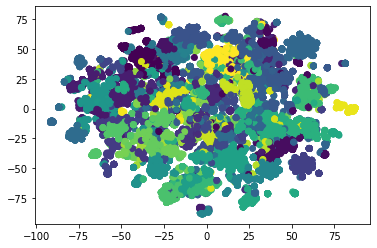

In [21]:
predict_df = pd.DataFrame(predict)

xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=predict_df)

plt.show()

In [22]:
# 그룹 10개만 (0 ~ 9까지)
predict_10 = list()
feature_10 = list()

for index, class_ in enumerate(predict):
    if class_ < 10:
        predict_10.append(class_)
        feature_10.append(train_onehot_ft[index])

print(len(predict_10))
print(len(feature_10))

2463
2463


In [0]:
feature_10_df = pd.DataFrame(feature_10)

In [24]:
transformed_10 = TSNE(n_components=2).fit_transform(feature_10_df)
print(transformed_10.shape)

(2463, 2)


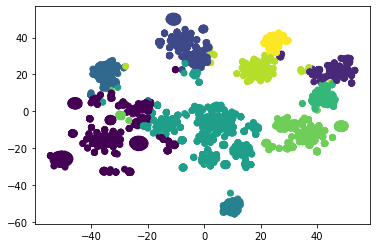

In [25]:
predict_10_df = pd.DataFrame(predict_10)

xs_10 = transformed_10[:, 0]
ys_10 = transformed_10[:, 1]
plt.scatter(xs_10, ys_10, c=predict_10_df)

plt.show()

## Save to CSV

In [0]:
class_dict = dict()
for index, class_ in enumerate(predict):
    if class_ not in class_dict:  # initial case
        group_list = list()
        group_list.append(train_label[index])
        class_dict[class_] = group_list
    else:
        class_dict[class_].append(train_label[index])


In [0]:
print(class_dict)

{1: ['Counter-Strike: Global Offensive', "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Grand Theft Auto V', "Tom Clancy's Rainbow Six® Siege", 'Rocket League®', 'Dead by Daylight', 'MONSTER HUNTER: WORLD', "Garry's Mod", 'eFootball  PES 2020', 'Human: Fall Flat', 'Scrap Mechanic', 'Left 4 Dead 2', 'Hunt: Showdown', 'Space Engineers', 'Call of Duty®: Black Ops III', 'MORDHAU', 'Risk of Rain 2', 'FOR HONOR™', 'Squad', 'Project Winter', 'Pummel Party', 'Overcooked! 2', 'ShellShock Live', 'Rising Storm 2: Vietnam', 'Insurgency', 'Call of Duty: World at War', 'Brick Rigs', 'The LEGO® NINJAGO® Movie Video Game', 'UNO', 'Friday the 13th: The Game', 'The Escapists 2', 'Golf It!', 'Battlerite', 'Tom Clancy’s The Division™', 'TrackMania² Stadium', 'Left 4 Dead', 'Among Us', 'Quake Live™', 'NARUTO TO BORUTO: SHINOBI STRIKER', 'Call of Duty®: WWII', 'Red Orchestra 2: Heroes of Stalingrad with Rising Storm', 'Barotrauma', 'Ultimate Chicken Horse', 'Duck Game', '100% Orange Juice', 'Sniper Elite 3', 'Chivalry: 

In [0]:
class_dict = sorted(class_dict.items())

print(class_dict)

[(0, ['Firestone Idle RPG', 'Temtem', 'Data Hacker: Corruption', 'Atonement: Scourge of Time', ' Sands of Salzaar', 'CryoFall', 'Monster Sanctuary', 'The Albino Hunter', 'Chrono Ark', 'Touhou Genso Wanderer -Reloaded-', 'Home Behind', 'Gordian Quest', 'WORLD OF HORROR', 'DemonCrawl', '吞食孔明传 Tunshi Kongming Legends', 'Aground', 'ClickRaid2', 'Backbone: Prologue', 'Moon Hunters', 'Littlewood', '武林志（Wushu Chronicles）', 'ADOM (Ancient Domains Of Mystery)', 'Princess Lili - 丽丽公主', 'Legend of Grimrock', 'Chronicon', 'Avernum: Escape From the Pit', 'Knights of Pen and Paper 2', "A Legionary's Life", '奇幻秘境', 'Wayhaven Chronicles: Book Two', 'Stone Story RPG', 'Magicite', 'Hammerwatch', 'Noel The Mortal Fate S1-7', 'Journey Of Life', 'WARSAW', 'Wayhaven Chronicles: Book One', 'Low Magic Age', 'Uncharted Ocean', 'The Age of Decadence', 'Stygian: Reign of the Old Ones', '魔物娘と不思議な冒険～力の宝珠と帰還の塔～', 'Rogalia', 'Idle Adventure', 'Chosen 2', 'Wintermoor Tactics Club', "Horizon's Gate", "Queen's Wish: Th

In [0]:
with open('predict_cluster.csv', 'w', encoding='utf-8') as w_f:
    wr = csv.writer(w_f)
    wr.writerow(['class', 'games'])
    for class_, games in class_dict:
        games.insert(0, class_)
        wr.writerow(games)